![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Análisis de sentimientos y técnicas de NLP

En este taller podrán poner en práctica sus conocimientos sobre las diferentes técnicas para el procesamiento de lenguaje natural. El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción sentimientos de viajeros en Twitter

En este taller se usará el conjunto de datos de sentimientos sobre distintas aerolíneas de EE.UU. provenientes de Twitter. Cada observación contiene si el sentimiento de los tweets es positivo, neutral o negativo teniendo en cuenta distintas variables como aerolínea y las razones de los sentimientos negativos (como "retraso en el vuelo" o "servicio grosero"). El objetivo es predecir el sentimiento asociado a cada tweet. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/crowdflower/twitter-airline-sentiment).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score

In [3]:
# Lectura de la información de archivo .zip
tweets = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Tweets.zip', index_col=0)

# Visualización dataset
tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
# Impresión tamaño del cojunto de datos
tweets.shape

(14640, 14)

### Análisis descriptivo

In [5]:
# Cuenta de tweets por cada sentimiento
tweets['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [6]:
# Cuenta de tweets por cada aerolínea
tweets['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

<Axes: title={'center': 'Sentiminetos por aerolínea'}, xlabel='airline'>

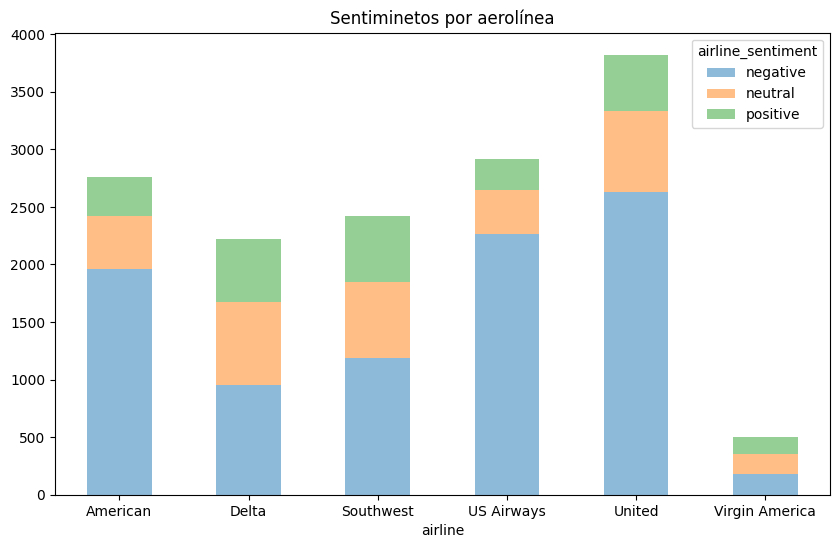

In [7]:
# Plot con cuenta de tweets por cada aerolínea y sentimiento
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiminetos por aerolínea")

### Liberias y Variables de interés y predicción

In [15]:
import nltk
nltk.download('wordnet')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
# Separación de variables predictoras (X) y de variable de interés (y)
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [10]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 1 - Uso de CountVectorizer

En la celda 1 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
# Se crea el objeto para vectorizar los documentos
vect = CountVectorizer(binary=True)
# Se ajusta el vector a los documentos y se transforma los datos de entrenamiento y test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
###############################################################################
## Se crea el modelo y ajusta sus parametros.
# Se definen los posibles valores de los hiperparametros para obtener un buen modelo
estimadores = [500,750,1000,1500]
profundidad = [100,150,200,250,300,350,400]
# Se hace la construccion de varios modelos con validacion cruzada variando sus hiperparametros
Hiper = []
accu_result = []

for n_est in estimadores:
    for deep in profundidad:
        print(n_est,deep)
        class_RF = RandomForestClassifier(n_estimators=n_est, max_depth=deep, random_state=1, n_jobs=-1)
        metrica_accu_RF = cross_val_score(class_RF, X_train_dtm, y_train, cv=5, scoring='accuracy')
        accu_result.append(np.mean(metrica_accu_RF))
        Hiper.append((n_est,deep))

In [12]:
class_RF = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=1, n_jobs=-1)
class_RF.fit(X_train_dtm, y_train)
y_pred_RF_test_1 = class_RF.predict(X_test_dtm)
# Evaluar el modelo usando classification_report
print("El accuraccy en test:")
accuracy_1 = accuracy_score(y_test, y_pred_RF_test_1)
print(accuracy_1)

El accuraccy en test:
0.7721440397350994


### Punto 2 - Eliminación de Stopwords

En la celda 2 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **eliminen stopwords** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
## Vectorización de tweets retirando Stopwords
vectorizacion_2 = CountVectorizer(stop_words='english')
X_train_vect_2 = vectorizacion_2.fit_transform(X_train)
X_train_vect_2.shape

(9808, 11777)

In [ ]:
## Modelo Random Forest y cálculo de Accuracy
RFclf_2 = RandomForestClassifier(class_weight={-1:0.3, 0:1, 1:1})
RFclf_2.fit(X_train_vect_2, y_train)
X_test_vect_2 = vectorizacion_2.transform(X_test)
y_pred_2 = RFclf_2.predict(X_test_vect_2)
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_2

0.7599337748344371

### Punto 3 - Lematización con verbos

En la celda 3 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer, **lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 3

lemmatizer = WordNetLemmatizer()

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
    text = text.lower()
    words = text.split()
    return [lemmatizer.lemmatize(word) for word in words]

# Vectorizar tweets utilizando con lematizacion
vect = CountVectorizer(analyzer=split_into_lemmas)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# Entrenar el modelo Random Forest
clf = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=1, n_jobs=-1)
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
accuracy_3 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_3)

[nltk_data] Downloading package wordnet to /root/nltk_data...


Accuracy: 0.7574503311258278


### Punto 4 - Multiples técnicas

En la celda 4 creen un modelo de random forest con la libreria sklearn que prediga el sentimiento de los tweets usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer, eliminen stopwords, lematizen el texto con verbos** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [31]:
# Celda 4

lemmatizer = WordNetLemmatizer()

# Definición de la función que tenga como parámetro texto y devuelva una lista de lemas
def split_into_lemmas(text):
  text = text.lower()
  words = text.split()
  return [lemmatizer.lemmatize(word) for word in words]

# Creación del objeto CountVectorizer con eliminación de stopwords y utilizando la función de lematización
vectorizer = CountVectorizer(stop_words='english', analyzer = split_into_lemmas)

X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

forest = RandomForestClassifier(n_estimators=500, max_depth=200, random_state=1, n_jobs=-1)
forest.fit(X_train_vect, y_train)

# Predicción y cálculo de accuracy
y_pred = forest.predict(X_test_vect)
accuracy_4 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_4}")

Accuracy: 0.7574503311258278


### Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos (random forest) y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

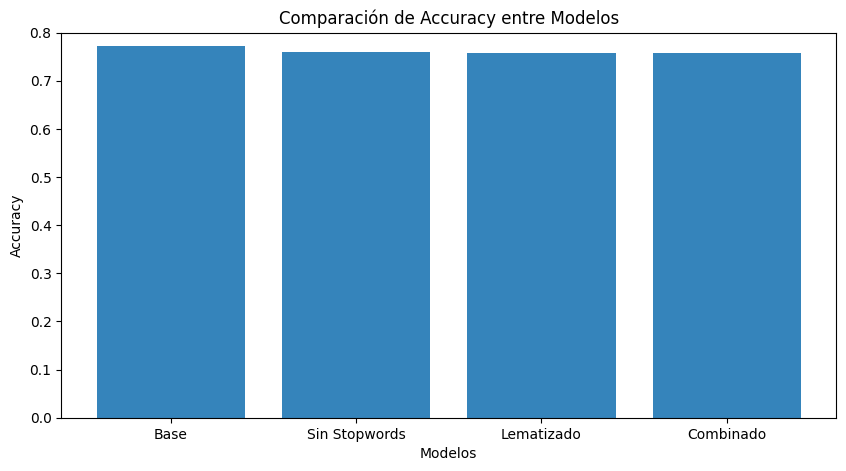

In [25]:
# Celda 5
import matplotlib.pyplot as plt

# lista con los accuracies
accuracies = [accuracy_1, accuracy_2, accuracy_3, accuracy_4]
modelos = ['Base', 'Sin Stopwords', 'Lematizado', 'Combinado']

plt.figure(figsize=(10, 5))
plt.bar(modelos, accuracies, alpha = 0.9)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos')
plt.ylim([0, 0.8])
plt.show()

# Conclusiones

Al comparar las métricas de desempeño de "Accuracy" entre los distintos modelos de análisis de sentimientos aplicados a tweets, se observa que el modelo base, que utiliza exclusivamente CountVectorizer, presenta el mejor desempeño.

Contrario a las expectativas iniciales, los modelos que incorporan técnicas más avanzadas, como la eliminación de stopwords y la lematización, no mejoraron la precisión. Esta situación podría explicarse por la importancia contextual de las stopwords en textos cortos como los tweets, donde cada palabra puede ser crucial para capturar el sentimiento expresado. Además, existe la posibilidad de que los modelos más complejos estén experimentando un sobreajuste con los datos de entrenamiento, lo que podría afectar negativamente su eficacia comparativa.

Estos resultados subrayan la importancia del preprocesamiento del texto en tareas específicas de procesamiento de lenguaje natural.